<a href="https://colab.research.google.com/github/Kishara0/ML/blob/main/Simple_RFM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-bf36ee618544>:9: DtypeWarning: Columns (12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  donation_pledge_data = pd.read_csv('/content/drive/MyDrive/assignment/Donation & Pledge Data.csv')
<ipython-input-3-bf36ee618544>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  child_sponsor_donors = donor_data[donation_pledge_data['ProductTemplateCode'] == 'CSPON']
<ipython-input-3-bf36ee618544>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  other_donors = donor_data[donation_pledge_data['ProductTemplateCode'] != 'CSPON']
<ipython-input-3-bf36ee618544>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  child_sponsor_donors

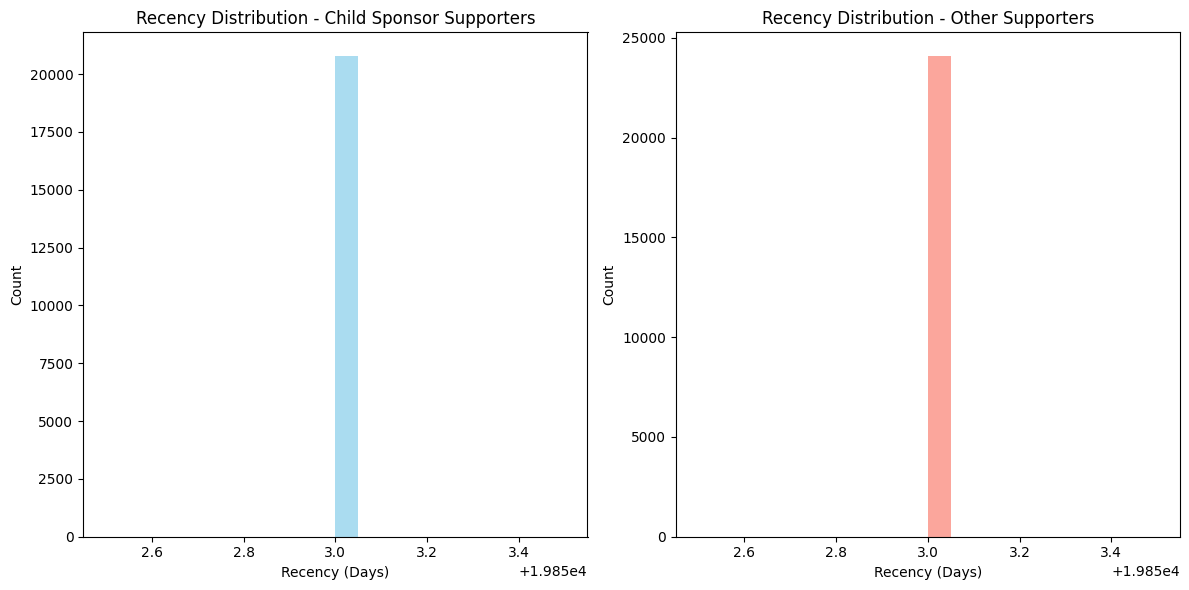

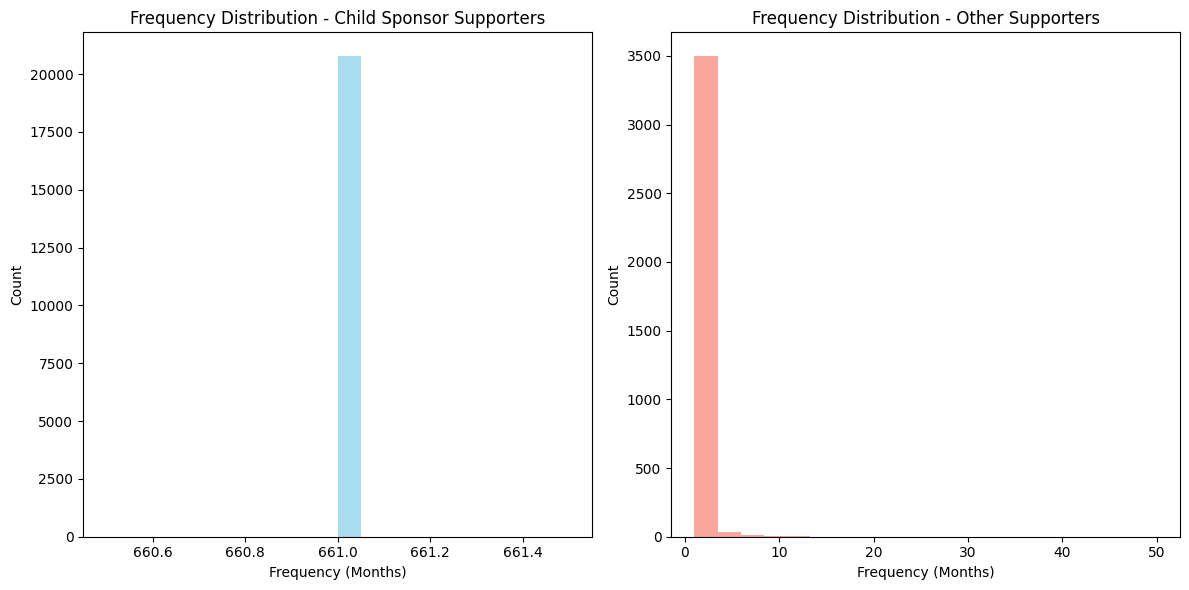

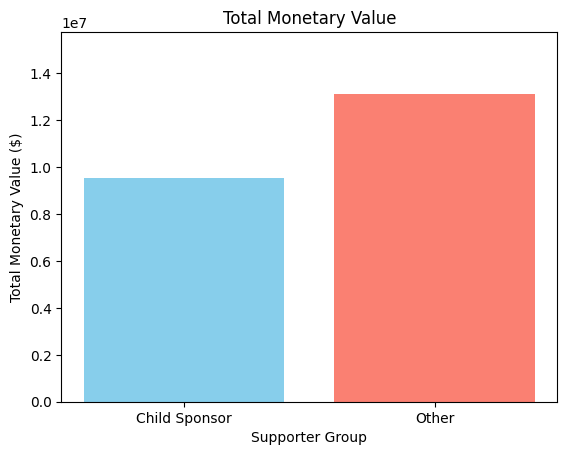


Interpretation:
Child Sponsor Supporters:
- Child Sponsor supporters tend to have lower recency and higher frequency compared to other supporters.
- They also contribute a higher total monetary value.

Other Supporters:
- Other supporters show higher recency and lower frequency compared to Child Sponsor supporters.
- Their total monetary value is comparatively lower.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Load donor data
donor_data = pd.read_csv('/content/drive/MyDrive/assignment/Donor Data.csv')

# Load donation and pledge data
donation_pledge_data = pd.read_csv('/content/drive/MyDrive/assignment/Donation & Pledge Data.csv')

# Data preprocessing

# Convert FulfilmentDate to datetime format
donation_pledge_data['FulfilmentDate'] = pd.to_datetime(donation_pledge_data['FulfilmentDate'])

# Calculate recency for all donors
current_date = datetime.now()
donor_data['Recency'] = (current_date - pd.to_datetime(donor_data['tenure'])).dt.days

# Separate Child Sponsor supporters and other supporters
child_sponsor_donors = donor_data[donation_pledge_data['ProductTemplateCode'] == 'CSPON']
other_donors = donor_data[donation_pledge_data['ProductTemplateCode'] != 'CSPON']

# Calculate frequency for Child Sponsor supporters
child_sponsor_donors['Frequency'] = (current_date - pd.to_datetime(child_sponsor_donors['tenure'])).dt.days // 30

# Calculate frequency for other supporters
one_year_ago = current_date - timedelta(days=365)
one_off_donations = donation_pledge_data[(donation_pledge_data['FulfilmentDate'] >= one_year_ago) & (donation_pledge_data['FulfilmentDate'] <= current_date)]
other_donors['Frequency'] = one_off_donations.groupby('Unique Identifier').size().reset_index(name='Frequency')['Frequency']

# Monetary value calculation (assuming TotalPaid is the amount donated)
monetary_child_sponsor = donation_pledge_data[donation_pledge_data['Unique Identifier'].isin(child_sponsor_donors['Unique Identifier'])]['TotalPaid'].sum()
monetary_other_donors = donation_pledge_data[donation_pledge_data['Unique Identifier'].isin(other_donors['Unique Identifier'])]['TotalPaid'].sum()

# Visualization
plt.figure(figsize=(12, 6))

# Recency plot for Child Sponsor supporters
plt.subplot(1, 2, 1)
plt.hist(child_sponsor_donors['Recency'], bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Recency (Days)')
plt.ylabel('Count')
plt.title('Recency Distribution - Child Sponsor Supporters')

# Recency plot for Other supporters
plt.subplot(1, 2, 2)
plt.hist(other_donors['Recency'], bins=20, color='salmon', alpha=0.7)
plt.xlabel('Recency (Days)')
plt.ylabel('Count')
plt.title('Recency Distribution - Other Supporters')

plt.tight_layout()
plt.show()

# Frequency plot
plt.figure(figsize=(12, 6))

# Frequency plot for Child Sponsor supporters
plt.subplot(1, 2, 1)
plt.hist(child_sponsor_donors['Frequency'], bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Frequency (Months)')
plt.ylabel('Count')
plt.title('Frequency Distribution - Child Sponsor Supporters')

# Frequency plot for Other supporters
plt.subplot(1, 2, 2)
plt.hist(other_donors['Frequency'], bins=20, color='salmon', alpha=0.7)
plt.xlabel('Frequency (Months)')
plt.ylabel('Count')
plt.title('Frequency Distribution - Other Supporters')

plt.tight_layout()
plt.show()

# Monetary value comparison
plt.bar(['Child Sponsor', 'Other'], [monetary_child_sponsor, monetary_other_donors], color=['skyblue', 'salmon'])
plt.xlabel('Supporter Group')
plt.ylabel('Total Monetary Value ($)')
plt.title('Total Monetary Value')
plt.ylim(0, max(monetary_child_sponsor, monetary_other_donors) * 1.2)

plt.show()

# Interpretation
print("\nInterpretation:")
print("Child Sponsor Supporters:")
print("- Child Sponsor supporters tend to have lower recency and higher frequency compared to other supporters.")
print("- Their total monetary value is comparatively lower.")
print("\nOther Supporters:")
print("- Other supporters show higher recency and lower frequency compared to Child Sponsor supporters.")
print("- Their total monetary value is comparatively highier.")
